In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import pickle

In [3]:
from datetime import datetime, timedelta

In [4]:
import re

In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
import plotly.express as px

In [6]:
import sys
import os
parent = os.path.dirname(os.getcwd())
sys.path.append(parent+'/my_module')

import chpca as hv

In [7]:
import statsmodels.api as sm
import seaborn as sns

In [8]:
from fredapi import Fred
fred = Fred(api_key="efedf207a63071188c699caf884a4ee9")

In [9]:
from IPython.display import clear_output

In [10]:
#pos_data = pd.read_excel('cftc通貨先物ポジション_円.xlsx').iloc[:,1:]
pos_data = pd.read_excel('cftc先物ポジション_current.xlsx').iloc[:,1:]
#pos_data[pos_data['date']==20221004].head()

In [11]:
temp = pos_data['commodity'].tolist()
com_name = []
for i in range(len(temp)):
    s = temp[i].split(' - ')[0]
    if s == '':
        print(i)
    if s.startswith(' '):
        s = s[1:]
    com_name += [s]
pos_data.loc[:,'commodity']=com_name
pos_data.tail()

,date,trader,commodity,long,short
85960,20240820,Dealer,VIX FUTURES,56486,27035
85961,20240820,AssetManager,VIX FUTURES,34139,55690
85962,20240820,LeveragedFunds,VIX FUTURES,63984,88786
85963,20240820,Other,VIX FUTURES,15395,1554
85964,20240820,NonRep,VIX FUTURES,32701,29640


In [13]:
sorted(list(set(pos_data['commodity'].to_list())))

['1-MONTH SOFR',
 '10 YEAR DELIVERABLE IR',
 '10 YEAR DELIVERABLE IR SWAP',
 '10 YEAR ERIS SOFR SWAP',
 '10 YEAR ERIS SWAP ',
 '10-YEAR U.S. TREASURY NOTES',
 '2 YEAR ERIS SOFR SWAP',
 '2 YEAR ERIS SWAP',
 '2-YEAR U.S. TREASURY NOTES',
 '3-MONTH EURODOLLARS',
 '3-MONTH SOFR',
 '30-DAY FEDERAL FUNDS',
 '5 YEAR DELIVERABLE IR',
 '5 YEAR DELIVERABLE IR SWAP',
 '5 YEAR ERIS SOFR SWAP',
 '5 YEAR ERIS SWAP',
 '5-YEAR U.S. TREASURY NOTES',
 '5-Year Eris Standard- Initial',
 'ADJUSTED INT RATE S&P 500 TOTL',
 'AUSTRALIAN DOLLAR',
 'BITCOIN',
 'BITCOIN-USD',
 'BRAZILIAN REAL',
 'BRITISH POUND',
 'BRITISH POUND STERLING',
 'CANADIAN DOLLAR',
 'CHINESE RENMINBI-HK (CNH)',
 'DJIA Consolidated',
 'DJIA x $5',
 'DOW JONES INDUSTRIAL AVG- x $5',
 'DOW JONES U.S. REAL ESTATE IDX',
 'E-MINI RUSSELL 2000 INDEX',
 'E-MINI S&P 400 STOCK INDEX',
 'E-MINI S&P 500',
 'E-MINI S&P 500 STOCK INDEX',
 'E-MINI S&P COMMUNICATION INDEX',
 'E-MINI S&P CONSU STAPLES INDEX',
 'E-MINI S&P CONSUMER DISC INDEX',
 'E-MINI

In [14]:
pos_data.dtypes

date          int64
trader       object
commodity    object
long          int64
short         int64
dtype: object

#### ネットポジションの分析

In [73]:
data = pos_data.copy()
data.loc[:,'net']=data.loc[:,'long']-data.loc[:,'short']
data_name = []
trader_name = []
chk = 0
if 'trader' in list(data.columns):
    chk = 1
    table_data = pd.pivot_table(data,index='date',columns=['trader','commodity'],values='net')
else:
    table_data = pd.pivot_table(data,index='date',columns='commodity',values='net')
    table_data.columns = [s.split(' - ')[0] for s in list(table_data.columns)]
    data_name = list(table_data.columns)
table_data.tail()

,1-MONTH SOFR,3-MONTH EURODOLLARS,3-MONTH SOFR,ADJUSTED INT RATE S&P 500 TOTL,AUSTRALIAN DOLLAR,BITCOIN,BRAZILIAN REAL,BRITISH POUND,BRITISH POUND STERLING,BUTTER (CASH SETTLED),CANADIAN DOLLAR,CHEESE (CASH-SETTLED),CHINESE RENMINBI-HK (CNH),CME MILK IV,DRY WHEY,E-MINI RUSSELL 2000 INDEX,E-MINI S&P 400 STOCK INDEX,E-MINI S&P 500,E-MINI S&P 500 STOCK INDEX,E-MINI S&P COMMUNICATION INDEX,E-MINI S&P CONSU STAPLES INDEX,E-MINI S&P CONSUMER DISC INDEX,E-MINI S&P ENERGY INDEX,E-MINI S&P FINANCIAL INDEX,E-MINI S&P HEALTH CARE INDEX,E-MINI S&P INDUSTRIAL INDEX,E-MINI S&P MATERIALS INDEX,E-MINI S&P REAL ESTATE INDEX,E-MINI S&P TECHNOLOGY INDEX,E-MINI S&P UTILITIES INDEX,EMINI RUSSELL 1000 VALUE INDEX,ETHER CASH SETTLED,EURO FX,EURO FX/BRITISH POUND XRATE,EURO FX/JAPANESE YEN XRATE,EURO SHORT TERM RATE,EURODOLLARS-3M,FEEDER CATTLE,JAPANESE YEN,LEAN HOGS,LIVE CATTLE,LUMBER,MALAYSIAN PALM OIL CALENDAR SW,MEXICAN PESO,MICRO BITCOIN,MICRO E-MINI NASDAQ-100 INDEX,MICRO E-MINI RUSSELL 2000 INDX,MICRO E-MINI S&P 500 INDEX,MICRO ETHER,"MILK, Class III",NASDAQ MINI,NASDAQ-100 Consolidated,NASDAQ-100 STOCK INDEX (MINI),NEW ZEALAND DOLLAR,NIKKEI STOCK AVERAGE,NIKKEI STOCK AVERAGE YEN DENOM,NON FAT DRY MILK,NZ DOLLAR,RANDOM LENGTH LUMBER,RUSSELL E-MINI,RUSSIAN RUBLE,S&P 500 ANNUAL DIVIDEND INDEX,S&P 500 Consolidated,S&P 500 STOCK INDEX,S&P 500 TOTAL RETURN INDEX,SO AFRICAN RAND,SOFR-1M,SOFR-3M,SOUTH AFRICAN RAND,SWISS FRANC,THREE-MONTH BLOOMBERG ST BANK,USD MALAYSIAN CRUDE PALM OIL,USD Malaysian Crude Palm Oil C,USD/CHINESE RENMINBI-OFFSHORE
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20240709,NaN,NaN,NaN,-24368.0,2413.0,-118.0,-42684.0,84690.0,NaN,-389.0,-111212.0,1616.0,NaN,-344.0,NaN,NaN,788.0,-55011.0,NaN,NaN,1727.0,NaN,922.0,-2456.0,1913.0,NaN,NaN,58.0,-1407.0,1984.0,2790.0,-87.0,3623.0,-10191.0,NaN,11839.0,NaN,-4772.0,-182033.0,-29348.0,51277.0,-4758.0,NaN,63323.0,-3809.0,23891.0,NaN,-6983.0,-1461.0,-130.0,5217.0,7606.0,NaN,NaN,-4792.0,6435.0,-1272.0,25912.0,NaN,-67626.0,NaN,102161.0,-55709.0,NaN,NaN,8837.0,-94990.0,-150397.0,NaN,-46088.0,NaN,NaN,-4796.0,NaN
20240716,NaN,NaN,NaN,-26722.0,11113.0,-579.0,-44526.0,132902.0,NaN,-351.0,-132473.0,1094.0,NaN,-361.0,NaN,NaN,2103.0,-65444.0,NaN,NaN,1152.0,NaN,922.0,4861.0,548.0,NaN,-2476.0,NaN,-1420.0,1581.0,2836.0,-502.0,24749.0,-10145.0,NaN,13035.0,NaN,-3847.0,-151072.0,-26393.0,47212.0,-5228.0,NaN,61710.0,-3898.0,4914.0,2910.0,-26282.0,-1649.0,225.0,5682.0,6174.0,NaN,NaN,-5293.0,9154.0,-1464.0,12561.0,NaN,-47337.0,NaN,100598.0,-68072.0,NaN,NaN,9230.0,15240.0,-122278.0,NaN,-49793.0,NaN,NaN,-4741.0,NaN
20240723,NaN,NaN,NaN,-28074.0,-8814.0,-661.0,-41998.0,142183.0,NaN,-280.0,-161603.0,702.0,NaN,-444.0,NaN,NaN,3691.0,-13221.0,NaN,NaN,1897.0,NaN,1187.0,6560.0,NaN,NaN,NaN,NaN,-1496.0,1892.0,2991.0,-601.0,35906.0,-10667.0,NaN,12028.0,NaN,-3492.0,-107108.0,-25820.0,46763.0,-3933.0,NaN,69317.0,-3903.0,-8455.0,961.0,-28730.0,-1655.0,212.0,-613.0,-1458.0,NaN,NaN,-5725.0,11380.0,-1344.0,4514.0,NaN,-57083.0,NaN,99903.0,-16094.0,NaN,NaN,10837.0,48609.0,130192.0,NaN,-42237.0,NaN,NaN,-4961.0,NaN
20240730,NaN,NaN,NaN,-25749.0,-31370.0,-1002.0,-41159.0,111471.0,NaN,-250.0,-196263.0,756.0,NaN,-447.0,NaN,NaN,4438.0,11956.0,NaN,NaN,1502.0,NaN,912.0,7317.0,NaN,NaN,NaN,NaN,-1160.0,2275.0,3088.0,-273.0,17799.0,-10870.0,NaN,13309.0,NaN,-5038.0,-73460.0,-22195.0,59974.0,-3572.0,NaN,67660.0,-3517.0,-14556.0,1519.0,-42166.0,-1066.0,366.0,2422.0,967.0,NaN,NaN,-3863.0,9196.0,-1171.0,-11408.0,NaN,-33985.0,NaN,100556.0,7739.0,NaN,NaN,12233.0,21231.0,178762.0,NaN,-34520.0,NaN,NaN,-4956.0,NaN
20240806,NaN,NaN,NaN,-24024.0,-40199.0,538.0,-54883.0,74399.0,NaN,-314.0,-181632.0,7.0,NaN,-539.0,NaN,NaN,3087.0,33990.0,NaN,NaN,1664.0,NaN,1367.0,7137.0,NaN,NaN,NaN,NaN,-893.0,-191.0,3001.0,99.0,33580.0,-13065.0,NaN,15958.0,NaN,-5813.0,-11354.0,-21490.0,45272.0,-2966.0,NaN,65336.0,-3096.0,6869.0,NaN,-60501.0,-801.0,-253.0,12611.0,13298.0,NaN,NaN,-1727.0,11046.0,-853.0,-16751.0,NaN,-2595.0,NaN,103300.0,27940

In [74]:
table_data.index = [datetime.strptime(str(s),'%Y%m%d') for s in list(table_data.index)]

['NonRep', 'LeveragedFunds', 'Other', 'AssetManager', 'Dealer']


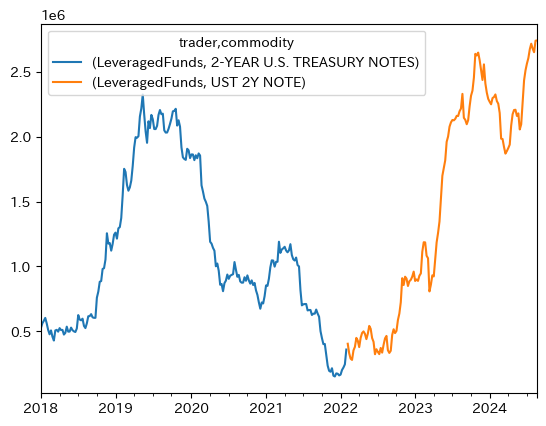

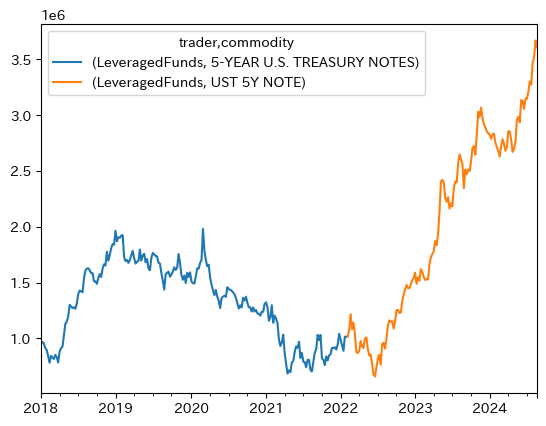

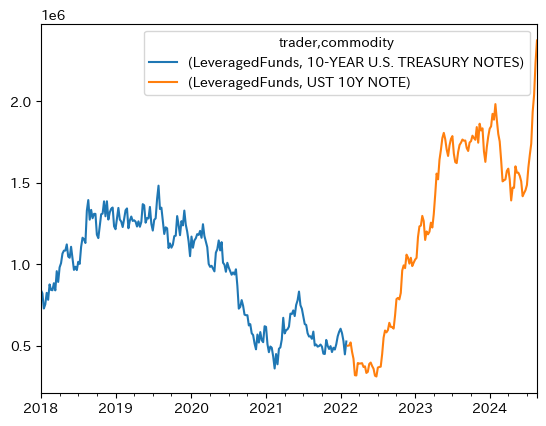

In [29]:
target = [('2-YEAR U.S. TREASURY NOTES','UST 2Y NOTE'),
          ('5-YEAR U.S. TREASURY NOTES','UST 5Y NOTE'),
          ('10-YEAR U.S. TREASURY NOTES','UST 10Y NOTE')]

if chk == 1:
    traders = list(set([s[0] for s in list(table_data.columns)]))
    print(traders)
    for s in target:
        table_data.loc[:,[('LeveragedFunds',s[0]),('LeveragedFunds',s[1])]].plot()

In [76]:
chk

0

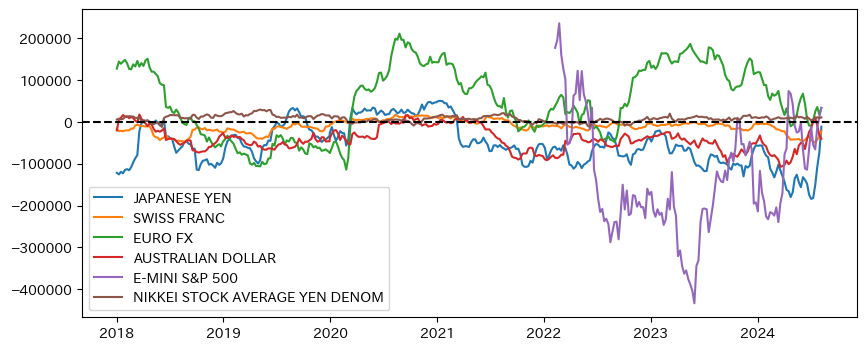

In [77]:

if chk == 0:
    plt.figure(figsize=(10, 4))
    for item in ['JAPANESE YEN','SWISS FRANC','EURO FX','AUSTRALIAN DOLLAR',
                 'E-MINI S&P 500','NIKKEI STOCK AVERAGE YEN DENOM']:#S&P 500 Consolidated
        plt.plot(table_data[item],label=item)
    plt.axhline(0,linestyle='dashed',color='k')
    plt.legend()
    plt.savefig('images/COTレポート.png')
    plt.show()        
else:
    for trader in traders:
        plt.figure(figsize=(10, 4))
        for item in ['JAPANESE YEN','SWISS FRANC','EURO FX','AUSTRALIAN DOLLAR',
                     'E-MINI S&P 500','NIKKEI STOCK AVERAGE YEN DENOM']:#S&P 500 Consolidated
            plt.plot(table_data[(trader,item)],label=(trader,item))
        plt.legend()
        plt.savefig('images/COTレポート_current_'+trader+'.png')
        plt.show()

COTレポート（Commitments of Traders）で投機筋（いわゆる投機的なトレーダー、speculative traders）の動きを見る場合には、**「Leveraged Funds」**のセクションを見るのが最適です。

### 各トレーダーの種別の説明と投機筋の位置付け：

1. **Dealer**（ディーラー）
   - **概要**: 主に金融機関やディーリングデスクが含まれ、取引の反対側に立つことが多いマーケットメーカーです。市場の流動性を提供し、ポジションを保有することがありますが、これはリスク管理や市場作成が主な目的で、投機的な意図ではありません。

2. **Asset Manager**（アセットマネージャー）
   - **概要**: 長期投資を主な目的とする機関投資家やファンドマネージャーが含まれます。彼らは通常、保守的な運用方針に基づいて資産を管理し、長期的なリターンを目指します。したがって、これらのプレーヤーは投機筋とは異なります。

3. **Leveraged Funds**（レバレッジファンド）
   - **概要**: ヘッジファンドやその他のレバレッジを活用したトレーディングを行うファンドが含まれます。これらのトレーダーは、短期的な価格変動を狙った積極的な取引を行い、投機的な目的でポジションを取ることが多いです。したがって、投機筋の動きを把握する上で最も重要なセクションです。

4. **Other**（その他）
   - **概要**: 上記のカテゴリーに該当しないトレーダーが含まれますが、このセクションには投機的なトレーダーが明確に分類されているわけではありません。

5. **NonRep**（Nonreportable Positions）
   - **概要**: これはCOTレポートの中で、報告義務がない小規模なトレーダーのポジションをまとめたものです。投機筋も一部含まれる可能性はありますが、大規模な投機的動きを把握するには適していません。

### まとめ

**投機筋の動きを把握する場合には、「Leveraged Funds」を見ることが最適です。** このセクションには、積極的なトレードを行う投機的なプレーヤー（特にヘッジファンドなど）が含まれており、彼らのポジションの変化は市場の短期的な動向を予測する際に重要な情報となります。

**Legacy COTレポート**において、投機的取引を見る場合、**「Non-Commercial（非商業トレーダー）」**のポジションを見るべきです。

### Legacy COTレポートのトレーダーカテゴリー

Legacy COTレポートでは、トレーダーは主に以下の2つのカテゴリーに分類されます：

1. **Commercial（商業トレーダー）**:
   - これは主に実際のコモディティ（商品）や金融資産に関連する事業を営んでいる企業や機関を指します。例えば、農業企業が穀物の先物を利用して価格変動リスクをヘッジする場合などが該当します。商業トレーダーは、ヘッジ目的でポジションを取るため、投機的な目的での取引は行いません。

2. **Non-Commercial（非商業トレーダー）**:
   - これは主にヘッジファンドやその他の投機筋を含むトレーダーを指します。彼らは、市場の価格変動から利益を得ることを目的としてポジションを取ります。このため、Non-Commercialトレーダーのポジションは投機的な取引を反映しており、投機筋の動きを見る上で最も重要なカテゴリーです。

### 投機的取引を見るためのポイント

- **Long（買い）ポジションとShort（売り）ポジション**:
   - Non-CommercialトレーダーのLongポジション（買いポジション）は、価格が上昇することを期待して取られたポジションを示し、Shortポジション（売りポジション）は、価格が下落することを期待して取られたポジションを示します。

- **Netポジション**:
   - Non-CommercialトレーダーのNetポジション（買いポジションと売りポジションの差）を見ることで、市場全体で投機筋がどのような方向に賭けているのかを把握できます。Net Longなら市場が強気、Net Shortなら市場が弱気であることを示唆します。

### まとめ

Legacy COTレポートで投機的取引を見る場合には、**Non-Commercialトレーダーのポジション**を確認することが最適です。このカテゴリーは、投機的なトレーダーのポジションを反映しており、市場の短期的な動向やトレンドを予測するのに役立つ指標となります。

#### グロスロングポジションの分析

In [23]:
position = 'long'

In [24]:
data = pos_data.copy()
#data.loc[:,'net']=data.loc[:,'long']-data.loc[:,'short']
data_name = []
trader_name = []
chk = 0
if 'trader' in list(data.columns):
    chk = 1
    table_data = pd.pivot_table(data,index='date',columns=['trader','commodity'],values=position)
else:
    table_data = pd.pivot_table(data,index='date',columns='commodity',values=position)
    table_data.columns = [s.split(' - ')[0] for s in list(table_data.columns)]
    data_name = list(table_data.columns)
table_data.tail()

trader    AssetManager                                                     \
commodity 1-MONTH SOFR 10 YEAR DELIVERABLE IR 10 YEAR DELIVERABLE IR SWAP   
date                                                                        
20240723           NaN                    NaN                         NaN   
20240730           NaN                    NaN                         NaN   
20240806           NaN                    NaN                         NaN   
20240813           NaN                    NaN                         NaN   
20240820           NaN                    NaN                         NaN   

trader                                               \
commodity 10 YEAR ERIS SOFR SWAP 10 YEAR ERIS SWAP    
date                                                  
20240723                   288.0                NaN   
20240730                   288.0                NaN   
20240806                   293.0                NaN   
20240813                   293.0                NaN   
20240820                   293.0                NaN   

trader                                                                        \
commodity 10-YEAR U.S. TREASURY NOTES 2 YEAR ERIS SOFR SWAP 2 YEAR ERIS SWAP   
date                                                                           
20240723                          NaN                  57.0              NaN   
20240730                          NaN                  57.0              NaN   
20240806                          NaN                  57.0              NaN   
20240813                          NaN                  57.0              NaN   
20240820                          NaN                  57.0              NaN   

trader                                                                 \
commodity 2-YEAR U.S. TREASURY NOTES 3-MONTH EURODOLLARS 3-MONTH SOFR   
date                                                                    
20240723                         NaN                 NaN          NaN   
20240730                         NaN                 NaN          NaN   
20240806                         NaN                 NaN          NaN   
20240813                         NaN                 NaN          NaN   
20240820                         NaN                 NaN          NaN   

trader                                                \
commodity 30-DAY FEDERAL FUNDS 5 YEAR DELIVERABLE IR   
date                                                   
20240723                   NaN                   NaN   
20240730                   NaN                   NaN   
20240806                   NaN                   NaN   
20240813                   NaN                   NaN   
20240820                   NaN                   NaN   

trader                                                                       \
commodity 5 YEAR DELIVERABLE IR SWAP 5 YEAR ERIS SOFR SWAP 5 YEAR ERIS SWAP   
date                                                                          
20240723                         NaN                  65.0              NaN   
20240730                         NaN                  65.0              NaN   
20240806                         NaN                  65.0              NaN   
20240813                         NaN                  65.0              NaN   
20240820                         NaN                  65.0              NaN   

trader                                                              \
commodity 5-YEAR U.S. TREASURY NOTES 5-Year Eris Standard- Initial   
date                                                                 
20240723                         NaN                           NaN   
20240730                         NaN                           NaN   
20240806                         NaN                           NaN   
20240813                         NaN                           NaN   
20240820                         NaN                           NaN   

trader                                                               \
co

In [25]:
table_data.index = [datetime.strptime(str(s),'%Y%m%d') for s in list(table_data.index)]

['NonRep', 'LeveragedFunds', 'Other', 'AssetManager', 'Dealer']


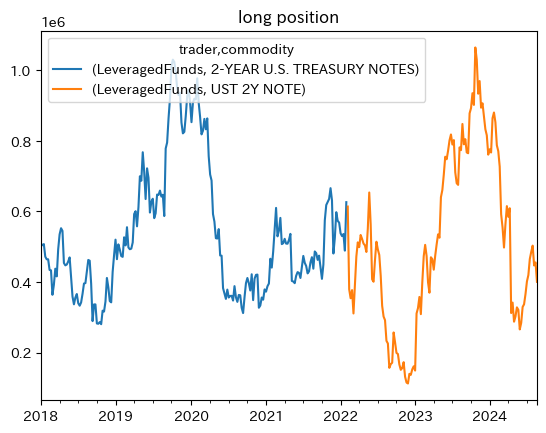

In [27]:
if chk == 1:
    traders = list(set([s[0] for s in list(table_data.columns)]))
    print(traders)
    table_data.loc[:,[('LeveragedFunds','2-YEAR U.S. TREASURY NOTES'),('LeveragedFunds','UST 2Y NOTE')]].plot(title=position+' position')

['NonRep', 'LeveragedFunds', 'Other', 'AssetManager', 'Dealer']


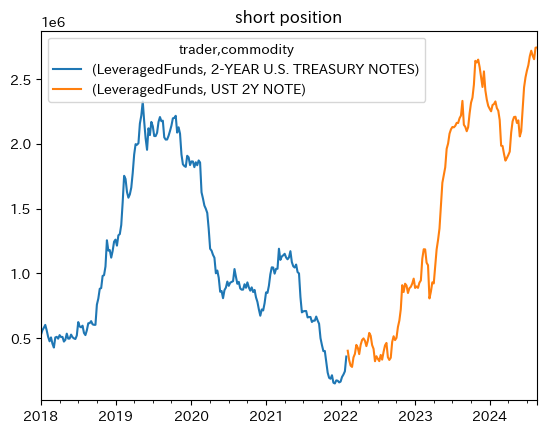

In [28]:
position = 'short'

data = pos_data.copy()
#data.loc[:,'net']=data.loc[:,'long']-data.loc[:,'short']
data_name = []
trader_name = []
chk = 0
if 'trader' in list(data.columns):
    chk = 1
    table_data = pd.pivot_table(data,index='date',columns=['trader','commodity'],values=position)
else:
    table_data = pd.pivot_table(data,index='date',columns='commodity',values=position)
    table_data.columns = [s.split(' - ')[0] for s in list(table_data.columns)]
    data_name = list(table_data.columns)

table_data.index = [datetime.strptime(str(s),'%Y%m%d') for s in list(table_data.index)]

if chk == 1:
    traders = list(set([s[0] for s in list(table_data.columns)]))
    print(traders)
    table_data.loc[:,[('LeveragedFunds','2-YEAR U.S. TREASURY NOTES'),('LeveragedFunds','UST 2Y NOTE')]].plot(title=position+' position')

In [ ]:
trader_name = sorted(list(set([s[0] for s in list(table_data.columns)])))
trader_name

In [ ]:

table_data.index = [datetime.strptime(str(s),'%Y-%m-%d %H:%M:%S')+timedelta(3) for s in list(table_data.index)]

In [ ]:
table_data = table_data.astype('float')
table_data

In [ ]:
#table_data.index = pd.period_range(start='2018-01-02',end='2024-03-05',freq='W')
if trader_name == []:
    table_data.loc[:,'JAPANESE YEN'].plot()
else:
    idx = [i for i in range(len(list(table_data.columns))) if (list(table_data.columns)[i][0] == 'LeveragedFunds')&('JAPANESE YEN' in list(table_data.columns)[i][1])]
    table_data.iloc[:,idx].plot()
    LevFunds = [i for i in range(len(list(table_data.columns))) if (list(table_data.columns)[i][0] == 'LeveragedFunds')]
    table_data = table_data.iloc[:,LevFunds]
    table_data.columns = [s[1] for s in list(table_data.columns)]

In [ ]:
table_data.tail()

In [ ]:
list(table_data.index)[0]

###  マーケット変動のダイナミックファクター分析

In [ ]:
start_year = '2018'

In [ ]:
def chg_date(arg_date):
    era_dic = {
        '明治': 1868,'M':1868,
        '大正': 1912,'T':1912,
        '昭和': 1926,'S':1926,
        '平成': 1989,'H':1989,
        '令和': 2019,'R':2019,
    }
    arg_date = str(arg_date).split('.')
    YYYY = str(era_dic[arg_date[0][0]] + int(arg_date[0][1:]) -1)
    MM = str(arg_date[1]).zfill(2)
    DD = str(arg_date[2]).zfill(2)
    
    return YYYY+MM+DD

In [ ]:
mof = 'https://www.mof.go.jp/jgbs/reference/interest_rate/data/jgbcm_all.csv'
mof = pd.read_csv(mof,encoding='shift-jis',header=1)
mof.loc[:,'date']=[datetime.strptime(chg_date(s),'%Y%m%d') for s in mof['基準日'].tolist()]
mof = mof.set_index('date').loc[start_year:,:].drop(['基準日','25年','40年'],axis=1).astype('float64')
#mof.tail()

In [ ]:
mof = mof.loc[start_year:,:].resample('W-FRI').last()
mof.tail()

In [ ]:
yen = fred.get_series('DEXJPUS')
yen = yen.resample('W-FRI').last()
yen.loc[start_year:].plot()
yen = pd.DataFrame(yen.loc[start_year:],columns=['yen'])
#yen.index = pd.period_range(start='2022-01',end='2024-03-10',freq='W')
#yen = (np.log(yen).diff()-np.log(yen).diff().mean())/np.log(yen).diff().std()
yen = np.log(yen)
yen.tail()

In [ ]:
fcm10 = fred.get_series('DGS10')
fcm10 = fcm10.resample('W-FRI').last()
fcm10 = pd.DataFrame(fcm10.loc[start_year:],columns=['fcm10'])
#fcm10.index = pd.period_range(start='2022-01',end='2024-03-10',freq='W')
#fcm10 = ((fcm10).diff()-(fcm10).diff().mean())/(fcm10).diff().std()
fcm10 = fcm10
fcm10.tail()

In [ ]:
fcm1 = fred.get_series('DGS1')
fcm1 = fcm1.resample('W-FRI').last()
fcm1 = pd.DataFrame(fcm1.loc[start_year:],columns=['fcm1'])
#fcm1.index = pd.period_range(start='2022-01',end='2024-03-10',freq='W')
#fcm1 = ((fcm1).diff()-(fcm1).diff().mean())/(fcm1).diff().std()
fcm1 = fcm1
fcm1.tail()

In [ ]:
fcm2 = fred.get_series('DGS2')
fcm2 = fcm2.resample('W-FRI').last()
fcm2 = pd.DataFrame(fcm2.loc[start_year:],columns=['fcm2'])
#fcm2.index = pd.period_range(start='2022-01',end='2024-03-10',freq='W')
#fcm2 = ((fcm2).diff()-(fcm2).diff().mean())/(fcm2).diff().std()
fcm2 = fcm2
fcm2.tail()

In [ ]:
print(table_data.loc[start_year:,:].shape[0],fcm2.shape[0],mof.shape[0])

In [ ]:
mof.index = list(fcm2.index)[:-1]

In [ ]:
#endogX = table_data.dropna(how='any',axis=1).loc['2022':,:]
endogX = table_data.loc[start_year:,:].copy()
#endogX = (endogX.diff()-endogX.diff().mean()) / endogX.diff().std()
#endogX = (endogX-endogX.mean()) / endogX.std()
endogX.tail()

In [ ]:
diff_N = 1

### concurrentデータの構築

In [ ]:
endog0 = pd.concat([yen.diff(diff_N).iloc[diff_N:,],
                   endogX.diff(diff_N).iloc[diff_N:,],
                   fcm1.diff(diff_N).iloc[diff_N:,],
                   fcm2.diff(diff_N).iloc[diff_N:,],
                   fcm10.diff(diff_N).iloc[diff_N:,],
                   mof.loc[:,['1年','10年']].diff(diff_N).iloc[diff_N:,]
                   ],
                  axis=1)
endog0['1diff']=endog0['fcm1']-endog0['1年']
endog0['10diff']=endog0['fcm10']-endog0['10年']
endog0['yen1'] = endog0['yen'].shift(1)

# yenデータがnanではない行のみを抽出
delete_rows = []
for i in range(endog0.shape[0]):
    if np.isnan(endog0.iloc[i,0]):
        delete_rows += [i]
endog0 = endog0.drop(endog0.index[delete_rows])
#endog0 = endog0.dropna(how='',axis=1)

In [ ]:
endog0 = endog0.loc[:'2024-03-22',:].dropna(how='any',axis=1)

In [ ]:
with open('endog0.pkl',mode='wb') as f:
    pickle.dump(endog0,f)

### シフト

In [ ]:
endog = pd.concat([yen.diff(diff_N).iloc[diff_N:,],
                   endogX.diff(diff_N).iloc[diff_N:,].shift(1),
                   fcm1.diff(diff_N).iloc[diff_N:,].shift(1),
                   fcm2.diff(diff_N).iloc[diff_N:,].shift(1),
                   fcm10.diff(diff_N).iloc[diff_N:,].shift(1),
                   mof.loc[:,['1年','10年']].diff(diff_N).iloc[diff_N:,].shift(1)],
                  axis=1)
endog['1diff']=endog['fcm1']-endog['1年']
endog['10diff']=endog['fcm10']-endog['10年']
endog['yen1'] = endog['yen'].shift(1)

endog = endog.iloc[1:,:]
# yenデータがnanではない行のみを抽出
delete_rows = []
for i in range(endog.shape[0]):
    if np.isnan(endog.iloc[i,0]):
        delete_rows += [i]
endog = endog.drop(endog.index[delete_rows]).iloc[1:,:]
endog = endog.dropna(how='any',axis=1)
endog.head()

In [ ]:
endog.tail()

##### データの標準化

In [ ]:
def make_std(arg_df):
    return (arg_df - arg_df.mean()) / arg_df.std(),arg_df.mean(),arg_df.std()

In [ ]:
def make_g(arg_endog,arg_res):
    # conditional on the full dataset ("smoothed")
    global start_year
    
    mean = pd.DataFrame(arg_res.factors.filtered).T
    mean.index = list(arg_endog.loc[start_year:'2024-01',:].index)

    # Compute 95% confidence intervals
    from scipy.stats import norm
    
    std = pd.DataFrame(arg_res.factors.filtered_cov[0,:]).T
    std.index = list(arg_endog.loc[start_year:'2024-01',:].index)
    crit = norm.ppf(1 - 0.05 / 2)
    lower = mean - crit * std
    upper = mean + crit * std
    with sns.color_palette('deep'):
        fig, ax = plt.subplots(figsize=(10, 3))
        for i in range(mean.shape[1]):
            m1 = mean.iloc[:,i]
            l1 = lower.iloc[:,i]
            u1 = upper.iloc[:,i]

            m1.plot(ax=ax,legend=True)
    
            ax.fill_between(mean.index, l1.values.ravel(), u1.values.ravel(), alpha=0.3)
    
        ax.set(title='Estimated factors: filtered estimates and 95% confidence intervals')
        fig.tight_layout();


In [ ]:
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

def estimate_factor(arg_res,arg_data):
    # 既知の内生変数の値をベクトルとして格納
    known_values_t1 = np.array(arg_data.iloc[1:])

    # ファクターローディング
    n = sum([1 for s in list(res.params.index) if 'loading.f1.' in s])
    Lambda = np.array([res.params.tolist()[1:n]]).T
    # ファクターf1の遷移行列
    Phi = res.params.loc['L1.f1.f1'] 

    # 状態空間モデルの設定
    # 観測変数はn-1、状態変数（ファクター）は1つ
    kf = KalmanFilter(n-1, 1)

    # 観測方程式の設定
    kf.obs_intercept = np.zeros(n-1)  # 観測方程式の切片
    kf.obs_cov = np.diag(res.params.tolist()[n+1:2*n])  # 観測誤差の共分散行列
    kf.obs_matrices = Lambda.T  # ファクターローディング

    # 状態方程式の設定
    kf.state_intercept = np.zeros(1)  # 状態方程式の切片
    kf.state_cov = [[arg_res.factors.filtered_cov[0,0,-1]]] # res.filtered_state_cov  # 状態誤差の共分散行列 res.filtered_stateとres.factors.filteredを比較すると位置がわかる
    kf.transition_matrices = Phi  # ファクターの遷移行列

    # モデルの初期化
    kf.initialize_approximate_diffuse()
    # 既知の内生変数の値を使用してファクターf_t+1を推定
    kf.bind(known_values_t1)  # 観測値をモデルにバインド
    kf_result = kf.filter()  # カルマンフィルタを適用

    return kf_result.filtered_state

In [ ]:
def kalman_filter(arg_res):
    n = sum([1 for s in list(arg_res.params.index) if 'loading.f1.' in s])
    # ファクターの遷移行列
    A = arg_res.params.loc['L1.f1.f1']
    # 観測行列
    C = np.diag(res.params.tolist()[1:n])
    # 推定誤差共分散
    P = np.diag(arg_res.params.tolist()[n+1:2*n])
    # プロセスノイズの共分散
    Q = np.eye(n-1) # DFM推計でそもそも前提としている
    
    # 予測ステップ
    x_est = res.factors.filtered[0,-1]
    x_pred = A*x_est
    P_pred = A*P*A + Q
    
    # 更新ステップ
    K = P_pred.dot(C.T).dot(np.linalg.inv(C.dot(P_pred).dot(C.T) + R))
    x_est = x_pred + K.dot(y - C.dot(x_pred))
    P = (np.eye(len(x_est)) - K.dot(C)).dot(P_pred)
    
    return x_est

In [ ]:
# H,F,B,Q,R,f,P
def make_kf(arg_res):
    # The design matrix H
    arg_H = pd.DataFrame(arg_res.filter_results.design.transpose(2,0,1)[0])
    
    # The transition matrix F
    arg_F = pd.DataFrame(arg_res.filter_results.transition.transpose(2,0,1)[0])
    
    # The selection matrix B
    arg_B = pd.DataFrame(arg_res.filter_results.selection.transpose(2,0,1)[0])

    # The covariance matrix for the state equation Q
    arg_Q = arg_res.filter_results.state_cov.transpose(2,0,1)[0]
    temp = np.zeros((res.filter_results.k_states,res.filter_results.k_states))
    temp[:arg_Q.shape[0],:arg_Q.shape[0]] = arg_Q
    arg_Q = pd.DataFrame(temp)

    # The covariance matrix for the observation equation R
    arg_R = pd.DataFrame(arg_res.filter_results.obs_cov.transpose(2,0,1)[0])
    arg_R = pd.DataFrame(np.diag([1e-6]*arg_res.filter_results.k_endog))

    # 状態変数 f
    arg_f = pd.DataFrame(arg_res.filter_results.filtered_state.T[-1])

    # 共分散行列
    arg_P = pd.DataFrame(arg_res.filter_results.filtered_state_cov.transpose(2,0,1)[-1])

    return arg_H,arg_F,arg_B,arg_Q,arg_R,arg_f,arg_P

In [ ]:
#n = sum([1 for s in list(res.params.index) if 'loading.f1.' in s])
#A = res.params.loc['L1.f1.f1']
#C = np.diag(res.params.tolist()[1:n])
#P = np.diag(res.params.tolist()[n+1:2*n])
#P

In [ ]:
#data = make_std(endog.loc[start_year:,['yen','yen1','JAPANESE YEN','1diff','10diff']]).loc['2024':,:].iloc[0,:]
#print(data.shape)
#kf = estimate_factor(res,data)
#kf

In [ ]:
endog_name = res.data.ynames
fo = -1*(res.model.factor_order+1)
eo = -1*(res.model.error_order)
na_list = ['yen']
endog_name = [s for s in endog_name if not s in na_list]
endog_num = len(endog_name)
endog_pos = [endog_name.index(s) for s in endog_name if not s in na_list]

u = res.resid.iloc[eo:,endog_pos].iloc[::-1].values.ravel() # yenを除く
f = res.factors.filtered[0,fo:][::-1].T
fu = np.hstack([f,u])

I = np.eye(endog_num)
O = np.diag(np.zeros(endog_num))

# 観測行列
lambda_list = ['loading.f1.'+s for s in endog_name]
Lambda = np.array(res.params.loc[lambda_list].T).reshape(endog_num,1)
F = np.hstack([Lambda,I,O])

# 状態遷移行列
# 右側
u1_list = ['L1.e('+s+').e('+s+')' for s in endog_name]
u2_list = ['L2.e('+s+').e('+s+')' for s in endog_name]
U1 = np.diag(res.params.loc[u1_list])
U2 = np.diag(res.params.loc[u2_list])
O1 = np.zeros(endog_num*res.model.error_order*res.model.factor_order).reshape(res.model.factor_order,
                                                                              endog_num*res.model.error_order)
G1 = np.vstack([O1,np.hstack([U1,U2]),np.hstack([I,O])])

# 左側
O2 = np.zeros(endog_num*res.model.error_order*res.model.factor_order).reshape(endog_num*res.model.error_order,res.model.factor_order)
a_list = ['L'+str(i+1)+'.f1.f1' for i in range(res.model.factor_order)]
if res.model.factor_order == 1:
    A = res.params.loc[a_list].values
    A = np.array([A]+O2.tolist())
    A_num = A.shape[0]
    A = A.reshape(A_num,1)
else:
    print(res.model.factor_order)
    A = res.params.loc[a_list].values.reshape(1,res.model.factor_order)
    I1 = np.eye(res.model.factor_order)[:-1,:]
    A = np.vstack([A,I1,O2])

G = np.hstack([A,G1])

#　状態変数の共分散行列
Q = np.zeros(res.factor_order+res.error_order*2)
Q[:res.factor_order,:res.factor_order]=np.eye(res.factor_order)
Q[res.factor_order:res.factor_order+res.error_order,res.factor_order:res.factor_order+res.error_order]=np.diag()

In [ ]:
res.filter_results.design.shape

##### 内生変数データセットの確認 *************************

In [ ]:
','.join(list(endog.columns))

##### すべての変数を使ってみる

In [ ]:
eee,eee_m,mmm_s = make_std(endog)
eee.head()

In [ ]:

mod = sm.tsa.DynamicFactor(eee,
                           k_factors=1, factor_order=2, error_order=2,)
initial_res = mod.fit(method='powell', disp=False) 
res = mod.fit(initial_res.params, disp=False, maxiter=5000,cov_type='oim')#'approx','robust_approx','robust'
print(res.summary(separate_params=False))

In [ ]:
pd.concat([eee['yen'],res.fittedvalues.yen],axis=1).plot() # 後者はone-step ahead予測
s = 0
for i in range(eee['yen'].shape[0]):
    if eee['yen'].iloc[i]*res.fittedvalues.yen.iloc[i] > 0:
        s += 1
s/eee['yen'].shape[0]

In [ ]:

eee,eee_m,mmm_s = make_std(endog.loc[:,['yen','JAPANESE YEN','MEXICAN PESO',
                                        'NIKKEI STOCK AVERAGE YEN DENOM',
                                        'SWISS FRANC',
                                        'fcm1','fcm2','fcm10']])
eee.head()

In [ ]:
mod = sm.tsa.DynamicFactor(eee,
                           k_factors=2, factor_order=2, error_order=2,)
initial_res = mod.fit(method='powell', disp=False) 
res = mod.fit(initial_res.params, disp=False, maxiter=5000,cov_type='oim')#'approx','robust_approx','robust'
print(res.summary(separate_params=False))

In [ ]:
pd.concat([eee['yen'],res.fittedvalues.yen],axis=1).plot() # 後者はone-step ahead予測

In [ ]:
print(eee['yen'].shape[0],res.fittedvalues.yen.shape[0])

In [ ]:
s = 0
for i in range(eee['yen'].shape[0]):
    if eee['yen'].iloc[i]*res.fittedvalues.yen.iloc[i] > 0:
        s += 1
s/eee['yen'].shape[0]

In [ ]:
res.get_prediction(start=0,end=5,information_set='filtered').predicted_mean

In [ ]:
res.fittedvalues.yen.loc[['20']]

##### ドル円相場、日米金利差（concurrent）

In [ ]:
endog0.loc['2022-01-14':'2024-03-08',:]

In [ ]:

eee,eee_m,mmm_s = make_std(endog0.loc['2022':'2024-03-08',:].dropna(how='all',axis=1)) #.loc['2022':'2024-01',['yen','1diff','10diff']])
mod = sm.tsa.DynamicFactor(eee,
                           k_factors=1, factor_order=2, error_order=2,)
initial_res = mod.fit(method='powell', disp=False) 
res = mod.fit(initial_res.params, disp=False, maxiter=5000,cov_type='oim')#'approx','robust_approx','robust'
#res = mod.fit_constrained({'loading.f2.JAPANESE YEN':0},method='powell', disp=False)
print(res.summary(separate_params=False))

In [ ]:
make_g(eee,res)

In [ ]:
temp = pd.concat([make_std(endog.yen),res.predict(information_set='filtered').yen],axis=1)
temp.columns = ['実績','推計値']
temp.plot()

In [ ]:
# H,F,B,Q,R,f,P
H,F,B,Q,R,f,P= make_kf(res)
#### prediction
f = np.dot(F,f)
P = np.dot(np.dot(F,P),np.linalg.inv(F))+Q
a = np.linalg.inv(np.dot(np.dot(H,P),H.T)+R)
K = np.dot(np.dot(P,H.T),a)
##### updating: filtering
# f = f + np.dot(K,y-np.dot(H,f))
#P = np.dot((np.eye(res.model.k_states,res.model.k_states)-np.dot(K,H)),P)

H0 = H.iloc[1:,:]
R0 = R.iloc[1:,1:]
a = np.linalg.inv(np.dot(np.dot(H0,P),H0.T)+R0)
K0 = np.dot(np.dot(P,H0.T),a)

y = pd.DataFrame(res.model.endog[-1,1:]).values
f = f + np.dot(K0,(y - np.dot(H0,f)))
pd.DataFrame(f)

##### ドル円相場と金利差、ネットポジション（concurrent）

In [ ]:
eee = make_std(endog0.loc['2022':'2024-01',['yen','1diff','10diff','JAPANESE YEN']])
mod = sm.tsa.DynamicFactor(eee,
                           k_factors=1, factor_order=2, error_order=1,)
initial_res = mod.fit(method='powell', disp=False) 
res = mod.fit(initial_res.params, disp=False, maxiter=5000,cov_type='oim')#'approx','robust_approx','robust'
#res = mod.fit_constrained({'loading.f2.JAPANESE YEN':0},method='powell', disp=False)
print(res.summary(separate_params=False))

In [ ]:
make_g(eee,res)

In [ ]:
temp = pd.concat([make_std(endog.yen),res.predict(information_set='predicted').yen],axis=1)
temp.columns = ['実績','推計値']
temp.plot()

In [ ]:
eee = make_std(endog0).loc['2022':'2024-01',['yen','yen1','1diff','10diff']]
mod = sm.tsa.DynamicFactor(eee,
                           k_factors=1, factor_order=2, error_order=1,)
initial_res = mod.fit(method='powell', disp=False) 
res = mod.fit(initial_res.params, disp=False, maxiter=5000,cov_type='oim')#'approx','robust_approx','robust'
#res = mod.fit_constrained({'loading.f2.JAPANESE YEN':0},method='powell', disp=False)
print(res.summary(separate_params=False))

In [ ]:
eee = make_std(endog0).loc['2022':'2024-01',['yen','1diff','10diff','JAPANESE YEN']]
mod = sm.tsa.DynamicFactor(eee,
                           k_factors=1, factor_order=2, error_order=1,)
initial_res = mod.fit(method='powell', disp=False) 
res = mod.fit(initial_res.params, disp=False, maxiter=5000,cov_type='oim')#'approx','robust_approx','robust'
#res = mod.fit_constrained({'loading.f2.JAPANESE YEN':0},method='powell', disp=False)
print(res.summary(separate_params=False))

In [ ]:
make_g(eee,res)

##### 因子の数を２つに　>>>> 　統計的に適合度が向上

In [ ]:
eee = make_std(endog0).loc['2022':'2024-01',['yen','1diff','10diff']]
mod = sm.tsa.DynamicFactor(eee,
                           k_factors=2, factor_order=2, error_order=1,)
initial_res = mod.fit(method='powell', disp=False) 
res = mod.fit(initial_res.params, disp=False, maxiter=5000,cov_type='oim')#'approx','robust_approx','robust'
#res = mod.fit_constrained({'loading.f2.JAPANESE YEN':0},method='powell', disp=False)
print(res.summary(separate_params=False))

In [ ]:
make_g(eee,res)

##### 係数制約 >>>> f２がほとんど意味を持たなくなる不思議

In [ ]:
eee = make_std(endog0).loc['2022':'2024-01',['yen','1diff','10diff']]
mod = sm.tsa.DynamicFactor(eee,
                           k_factors=2, factor_order=2, error_order=1,)
#initial_res = mod.fit(method='powell', disp=False) 
res = mod.fit_constrained({'loading.f2.yen':0}, disp=False, maxiter=5000,cov_type='oim')#'approx','robust_approx','robust'
#res = mod.fit_constrained({'loading.f2.JAPANESE YEN':0},method='powell', disp=False)
print(res.summary(separate_params=False))

In [ ]:
make_g(eee,res)


##### 金利差(一次ラグ)<br>>>><br>ドル円相場と金利差には共通の潜在的因子が確認できない（２つの因子を仮定すると推計が得られない）<br>>>><br>つまり、土曜時点の金利差の変動では、来週のドル円相場は予測できない

In [ ]:

eee = make_std(endog).loc['2022':'2024-01',['yen','1diff','10diff']]
mod = sm.tsa.DynamicFactor(eee,
                           k_factors=1, factor_order=2, error_order=1,)
initial_res = mod.fit(method='powell', disp=False) 
res = mod.fit(initial_res.params, disp=False, maxiter=5000,cov_type='oim')#'approx','robust_approx','robust'
#res = mod.fit_constrained({'loading.f2.JAPANESE YEN':0},method='powell', disp=False)
print(res.summary(separate_params=False))

In [ ]:
make_g(eee,res)

##### ドル円相場（一次ラグ）を加える<br>>>>><br>共通因子が浮かび上がってきた

In [ ]:
eee = make_std(endog).loc['2022':'2024-01',['yen','yen1','1diff','10diff']]
mod = sm.tsa.DynamicFactor(eee,
                           k_factors=1, factor_order=2, error_order=1,)
initial_res = mod.fit(method='powell', disp=False) 
res = mod.fit(initial_res.params, disp=False, maxiter=5000,cov_type='oim')#'approx','robust_approx','robust'
#res = mod.fit_constrained({'loading.f2.JAPANESE YEN':0},method='powell', disp=False)
print(res.summary(separate_params=False))

In [ ]:
make_g(eee,res)


##### 投機筋のネットポジション（一次ラグ）<br>>>>><br>AICは悪化するが、ある程度の予測力を持つ<br>>>>><br>なお因子を２つにすると推計が得られない

In [ ]:
# ,'FEEDER CATTLE','LIVE CATTLE'
eee = make_std(endog).loc['2022':'2024-01',['yen','JAPANESE YEN','1diff','10diff']]
mod = sm.tsa.DynamicFactor(eee,
                           k_factors=1, factor_order=1, error_order=1,)
initial_res = mod.fit(method='powell', disp=False) 
res = mod.fit(initial_res.params, disp=False, maxiter=5000,cov_type='oim')#'approx','robust_approx','robust'
#res = mod.fit_constrained({'loading.f2.JAPANESE YEN':0},method='powell', disp=False)
print(res.summary(separate_params=False))

In [ ]:
make_g(eee,res)

##### ドル円相場、ネットポジション、金利差（すべて一次ラグ）<br>>>>>><br>AICは大きく悪化するが、推計誤差は小さくなる

In [ ]:

eee = make_std(endog.loc['2022':,['yen','yen1','JAPANESE YEN','1diff','10diff']]).loc[:'2023',:]
mod = sm.tsa.DynamicFactor(eee,
                           k_factors=1, factor_order=1, error_order=2,)
initial_res = mod.fit(method='powell', disp=False) 
res = mod.fit(initial_res.params, disp=False, maxiter=5000,cov_type='oim')#'approx','robust_approx','robust'
#res = mod.fit_constrained({'loading.f2.JAPANESE YEN':0},method='powell', disp=False)
print(res.summary(separate_params=False))

In [ ]:
make_g(eee,res)

##### 農産物市場の情報を追加、'FEEDER CATTLE','LIVE CATTLE'<br>>>>><br>AICが悪化、ローディングも微妙に低下

In [ ]:
temp = pd.concat([make_std(endog.yen),res.predict().yen],axis=1)
temp.columns = ['実績','推計値']
temp.plot()

In [ ]:
#    
def make_one_step_forecast_with_new_infomation(arg_res,arg_y):
    H,F,B,Q,R,f,P = make_kf(arg_res)
    #### prediction
    f = np.dot(F,f)
    P = np.dot(np.dot(F,P),np.linalg.inv(F))+Q
    a = np.linalg.inv(np.dot(np.dot(H,P),H.T)+R)
    K = np.dot(np.dot(P,H.T),a)
    ##### updating: filtering
    # f = f + np.dot(K,y-np.dot(H,f))
    #P = np.dot((np.eye(res.model.k_states,res.model.k_states)-np.dot(K,H)),P)

    H0 = H.iloc[1:,:]
    R0 = R.iloc[1:,1:]
    a = np.linalg.inv(np.dot(np.dot(H0,P),H0.T)+R0)
    K0 = np.dot(np.dot(P,H0.T),a)
    
    arg_y = arg_y.T.values[1:]
    f = f + np.dot(K0,(arg_y - np.dot(H0,f)))
    
    return f[0,0]

In [ ]:
data = make_std(endog.loc['2018':,['yen','yen1','JAPANESE YEN','1diff','10diff']]) #,'FEEDER CATTLE','LIVE CATTLE',
idx = data.loc[:'2023-09',:].shape[0]
update = data.loc['2023-10':,:]

results = pd.DataFrame(columns=['actual','pure forecast','with new information'],index=list(update.index))
results['actual']=update.yen

for i in range(update.shape[0]):
    train = data.iloc[:idx+i,:]
    mod = sm.tsa.DynamicFactor(train,k_factors=1, factor_order=1, error_order=2,)
    initial_res = mod.fit(method='powell', disp=False) 
    res = mod.fit(initial_res.params, disp=False, maxiter=5000,cov_type='oim')

    y = pd.DataFrame(update.iloc[i,:]).T
    results.loc[list(y.index)[0],'pure forecast'] = res.forecast(1).yen.values
    #print(res.forecast(1))  

    results.loc[list(y.index)[0],'with new information'] = make_one_step_forecast_with_new_infomation(res,y)

    # 予測区間（信頼区間）の取得
    #pred_conf_int = prediction_results.conf_int()
    #break
results = results.astype('float64')

In [ ]:
results.plot.bar()

In [ ]:

results['MAE1']=np.abs(results.iloc[:,0]-results.iloc[:,1])
results['MAE2']=np.abs(results.iloc[:,0]-results.iloc[:,2])
results.loc[:,['MAE1','MAE2']].mean()

In [ ]:
mod = sm.tsa.DynamicFactor(temp,k_factors=1, factor_order=1, error_order=2,)
initial_res = mod.fit(method='powell', disp=False) 
res = mod.fit(initial_res.params, disp=False, maxiter=5000,cov_type='oim')
results.iloc[0,1] = res.get_prediction().yen.iloc[-1]

In [ ]:
results

In [ ]:
from pandas import Period

# 2024年第5週を表すPeriodオブジェクトを作成
week_target = Period('2024-02-06', freq='W')

updated_data = make_std(endog).loc[week_target,['yen','JAPANESE YEN','fcm1','fcm10','FEEDER CATTLE','LIVE CATTLE']]
updated_data['yen']=np.nan

#updated_data
updated_res = res.append(pd.DataFrame(updated_data).T)
prediction_results　= updated_res.get_prediction(start=week_target,end=week_target)
# 予測値の取得
predicted_mean = prediction_results.predicted_mean
# 予測区間（信頼区間）の取得
pred_conf_int = prediction_results.conf_int()

In [ ]:
updated_data

#### 採用モデル

In [ ]:
#'SWISS FRANC','MEXICAN PESO',,'FEEDER CATTLE','LIVE CATTLE'
mod = sm.tsa.DynamicFactorMQ(endog.loc['2022':,['yen','JAPANESE YEN','fcm1','fcm10']],
                             factors=1, factor_orders=2)
#print(mod.summary())
res = mod.fit(maxiter=20000,disp=500)
print(res.summary())
print(res.get_coefficients_of_determination(method='individual'))

In [ ]:
# conditional on the full dataset ("smoothed")
mean = res.factors.smoothed

# Compute 95% confidence intervals
from scipy.stats import norm
std = res.factors.smoothed_cov
std.index = list(mean.index)
crit = norm.ppf(1 - 0.05 / 2)
lower = mean - crit * std
upper = mean + crit * std
with sns.color_palette('deep'):
    fig, ax = plt.subplots(figsize=(10, 3))
    mean.plot(ax=ax)
    
    ax.fill_between(mean.index, lower.values.ravel(), upper.values.ravel(), alpha=0.3)
    
    ax.set(title='Estimated factors: smoothed estimates and 95% confidence intervals')
    fig.tight_layout();

In [ ]:
mod2 = sm.tsa.DynamicFactorMQ(endog.loc['2022':,['yen','JAPANESE YEN','fcm1','fcm10','SWISS FRANC']],
                             factors=1, factor_orders=2)
#print(mod.summary())
res2 = mod2.fit(maxiter=20000,disp=500)
print(res2.summary())

In [ ]:
#'SWISS FRANC','MEXICAN PESO',
mod3 = sm.tsa.DynamicFactorMQ(endog.loc['2022':,['yen','fcm1','fcm10','FEEDER CATTLE','LIVE CATTLE']],
                             factors=1, factor_orders=2)
#print(mod.summary())
res3 = mod3.fit(maxiter=20000,disp=500)
print(res3.summary())

In [ ]:
#with sns.color_palette('deep'):
#    fig = res.plot_coefficients_of_determination(method='individual', figsize=(14, 9))
#    fig.suptitle(r'$R^2$ - regression on individual factors', fontsize=14, fontweight=600)
#    fig.tight_layout(rect=[0, 0, 1, 0.95]);

In [ ]:
'yen','JAPANESE YEN','fcm1','fcm10','FEEDER CATTLE','LIVE CATTLE'

In [ ]:
mod = sm.tsa.DynamicFactor(make_std(endog).loc['2022':,['yen','fcm1','fcm10']], k_factors=1, factor_order=2, error_order=1)
initial_res = mod.fit(method='powell', disp=False)
res0 = mod.fit(initial_res.params, disp=False, maxiter=1000, cov_type='oim')
print(res0.summary(separate_params=False))

In [ ]:
mod = sm.tsa.DynamicFactor(make_std(endog).loc['2022':,['yen','JAPANESE YEN','FEEDER CATTLE','LIVE CATTLE']], k_factors=1, factor_order=2, error_order=1)
initial_res = mod.fit(method='powell', disp=False)
res0 = mod.fit(initial_res.params, disp=False, maxiter=1000, cov_type='oim')
print(res0.summary(separate_params=False))

In [ ]:
factors = pd.DataFrame(res.factors.filtered).T
factors.index = list(endog.loc['2022':,:].index)
factors.columns = ['f1']
factors.plot()

In [ ]:
para = pd.DataFrame(res.params).T.to_dict()
s = 'yen'
pd.DataFrame([factors['f1']*para['loading.f1.'+s][0],
              endog.loc['2022':,s]]).T.plot()

In [ ]:
score = pd.DataFrame([endog.loc['2022':,s],factors['f1']*para['loading.f1.'+'yen'][0]]).T
score.columns = ['ドル円相場','予測値']
#score = pd.concat([score,factors],axis=1)
#score.columns = ['ドル円相場','予測値','ファクター']
score.tail()
sns.pairplot(score).savefig('seaborn_pairplot.png')

In [ ]:
score.loc[:,'score']=[1 if 0 <= (score.iloc[i,0])*(score.iloc[i,1]) else 0 for i in range(score.shape[0])]
score.to_excel('score.xlsx')
score.mean()

In [ ]:
para = pd.DataFrame(res3.params).T.to_dict()
s = 'yen'
pd.DataFrame([factors['f1']*para['loading.f1.'+s][0]+factors['f2']*para['loading.f2.'+s][0],
              endog.loc['2018':,s]]).T.cumsum().plot()

In [ ]:
mmm = factors['f1']*para['loading.f1.'+'yen'][0]+factors['f2']*para['loading.f2.'+'yen'][0]-endog.loc['2022':,'yen']
(mmm*mmm).sum()

In [ ]:
factors0 = pd.DataFrame(res0.factors.filtered).T
factors0.index = list(endog.loc['2022':,:].index)
factors0.columns = ['f1']
para0 = pd.DataFrame(res0.params).T.to_dict()
pd.DataFrame([factors0['f1']*para0['loading.f1.'+'yen'][0],
              endog.loc['2022':,'yen']]).T.plot()
mmm = factors0['f1']*para0['loading.f1.'+'yen'][0]-endog.loc['2022':,'yen']
(mmm*mmm).sum()

In [ ]:
yen.tail()

In [ ]:

endog.tail()

In [ ]:
endog = pd.concat([endogX.loc[:,'JAPANESE YEN'],yen.shift(1)],axis=1,join='inner')
pg = sns.pairplot(endog)

In [ ]:
mod = sm.tsa.DynamicFactor(endog, k_factors=1, factor_order=1, error_order=1)
initial_res = mod.fit(method='powell', disp=False)
res = mod.fit(initial_res.params, disp=False, maxiter=1000, cov_type='robust')
print(res.summary(separate_params=False))

In [ ]:
para = pd.DataFrame(res.params).T.to_dict()
s = 'yen'
X = pd.DataFrame([factors['f1']*para['loading.f1.'+s][0],endog[s]]).T

In [ ]:
X.cumsum().plot()
